In [1]:
import pandas as pd
import numpy as np
import uproot
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from ROOT import TCanvas, TGraphErrors, TGraph, gROOT
import ROOT
%jsroot on

Welcome to JupyROOT 6.22/06


In [2]:
pwd

'/eos/home-i00/n/nkasarag/SWAN_projects/HGCal_Particle_Identificatin_and_Energy_Reconstruction/Full_HGCal_Simulation/my_test'

In [3]:
folder = "/eos/user/n/nkasarag/Simulation_Full_HGCAL/rootFiles2/gitV08-08-00-v3/skimmed_root_files/"

sim = uproot.open("%s/test_pi0Info_3EnePoints_withoutProcessCuts_withCreatorProcess_jan16.root"%folder)

lst = ["genEn", "nSec", 'sec_pdgID', 'sec_charge', 'sec_kin', 'int_x', 'int_y', 'int_z', 'nparticle', 'particle_x', 'particle_y', 'particle_z', 'particle_pdgID', 'particle_charge', 'particle_kin', 'particle_process_id', 'particle_parent_id', 'particle_track_id', 'particle_creator_process']
df = sim["hits"].pandas.df( lst, flatten=False)#, entrystart=0, entrystop=1)
df = df.loc[df.nSec>0]
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,particle_y,particle_z,particle_pdgID,particle_charge,particle_kin,particle_process_id,particle_parent_id,particle_track_id,particle_creator_process
entry,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...","[-50.379963, -50.379963, -54.84294, -54.84294,...","[369.16513, 369.16513, 403.021, 403.021, 403.0...","[111.0, 111.0, 111.0, 221.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.5871296, 3.668304, 0.72766143, 2.8575602, 5...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 203.0, 203.0, 203.0, 203.0, 203.0, ...","[1.0, 1.0, 11678.0, 11678.0, 11678.0, 11678.0,...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas..."
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...","[-87.761345, -87.761345, -87.761345, -87.76134...","[323.28476, 323.28476, 323.28476, 323.28476, 3...","[111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[17.569706, 0.15691797, 0.89049697, 11.86062, ...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 54.0, 54.0, 54....","[1.0, 1.0, 1.0, 1.0, 56.0, 54.0, 38085.0, 3808...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas..."
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...","[55.05006, 55.05006, 55.05006, 55.05006, 55.05...","[321.5362, 321.5362, 321.5362, 321.5362, 321.5...","[221.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[28.215618, 12.31474, 1.8141611, 1.035227, 4.1...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 0.0, 0.0, 0.0, 69.0, 69.0, 69.0, 13...","[1.0, 1.0, 1.0, 1.0, 1.0, 1306.0, 1306.0, 1306...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas..."
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...","[-89.62816, -89.62816, -89.62816, -89.62816, -...","[343.2035, 343.2035, 343.2035, 343.2035, 343.2...","[111.0, 111.0, 111.0, 221.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.682289, 7.424499, 1.502644, 15.435586, 0.59...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 123.0, 1.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 428.0, 114...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas..."
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....","[-96.587456, -96.587456, -96.587456, -100.6091...","[349.69333, 349.69333, 349.69333, 368.45538, 3...","[111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 221...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19.044394, 1.6271871, 2.3965306, 0.69658035, ...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 201...","[0.0, 0.0, 0.0, 1.0, 158.0, 157.0, 1.0, 148.0,...","[1.0, 1.0, 1.0, 158.0, 1306.0, 8430.0, 148.0, ...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas..."


In [4]:
def decode_creator_proc(df_):
    return np.array([x.decode() for x in df_.particle_creator_process])

def creator_proc_pi0(df_):
    return df_.particle_creator_process_decoded[df_.particle_pdgID==111.0]

def creator_proc_eta(df_):
    return df_.particle_creator_process_decoded[df_.particle_pdgID==221.0]

df["particle_creator_process_decoded"] = df.apply(decode_creator_proc, axis=1)
df["creator_proc_pi0"] = df.apply(creator_proc_pi0, axis=1)
df["creator_proc_eta"] = df.apply(creator_proc_eta, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,particle_pdgID,particle_charge,particle_kin,particle_process_id,particle_parent_id,particle_track_id,particle_creator_process,particle_creator_process_decoded,creator_proc_pi0,creator_proc_eta
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[111.0, 111.0, 111.0, 221.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.5871296, 3.668304, 0.72766143, 2.8575602, 5...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 203.0, 203.0, 203.0, 203.0, 203.0, ...","[1.0, 1.0, 11678.0, 11678.0, 11678.0, 11678.0,...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-..."
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[17.569706, 0.15691797, 0.89049697, 11.86062, ...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 54.0, 54.0, 54....","[1.0, 1.0, 1.0, 1.0, 56.0, 54.0, 38085.0, 3808...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[]
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[221.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[28.215618, 12.31474, 1.8141611, 1.035227, 4.1...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 0.0, 0.0, 0.0, 69.0, 69.0, 69.0, 13...","[1.0, 1.0, 1.0, 1.0, 1.0, 1306.0, 1306.0, 1306...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[pi-Inelastic]
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[111.0, 111.0, 111.0, 221.0, 111.0, 111.0, 111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.682289, 7.424499, 1.502644, 15.435586, 0.59...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 123.0, 1.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 428.0, 114...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic]"
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 221...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[19.044394, 1.6271871, 2.3965306, 0.69658035, ...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 201...","[0.0, 0.0, 0.0, 1.0, 158.0, 157.0, 1.0, 148.0,...","[1.0, 1.0, 1.0, 158.0, 1306.0, 8430.0, 148.0, ...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic,

In [14]:
def creator_proc_pi0_FHI(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_pdgID==111.0, df_.particle_parent_id<=0)]

df["creator_proc_pi0_FHI"] = df.apply(creator_proc_pi0_FHI, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,particle_track_id,particle_creator_process,particle_creator_process_decoded,creator_proc_pi0,creator_proc_eta,creator_proc_pi0_FHI,creator_proc_inelastic_pi0,creator_proc_decay_pi0,creator_proc_atRest_pi0,creator_proc_lt_121_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[1.0, 1.0, 11678.0, 11678.0, 11678.0, 11678.0,...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-...","[pi-Inelastic, pi-Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay, Decay, Dec...",[hBertiniCaptureAtRest],[]
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[1.0, 1.0, 1.0, 1.0, 56.0, 54.0, 38085.0, 3808...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[],"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay]",[],[]
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1306.0, 1306.0, 1306...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[pi-Inelastic],"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay]",[],[]
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 428.0, 114...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay]",[],[]
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[1.0, 1.0, 1.0, 158.0, 1306.0, 8430.0, 148.0, ...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...",[Decay],"[pi-Inelastic, pi-Inelastic, pi-Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...",[],[],[]


In [15]:
def creator_proc_inelastic_pi0(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_process_id==121, df_.particle_pdgID==111.0)]

def creator_proc_decay_pi0(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_process_id==201, df_.particle_pdgID==111.0)]

def creator_proc_atRest_pi0(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_process_id==151, df_.particle_pdgID==111.0)]

def creator_proc_lt_121_pi0(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_process_id<121, df_.particle_pdgID==111.0)]

df["creator_proc_inelastic_pi0"] = df.apply(creator_proc_inelastic_pi0, axis=1)
df["creator_proc_decay_pi0"] = df.apply(creator_proc_decay_pi0, axis=1)
df["creator_proc_atRest_pi0"] = df.apply(creator_proc_atRest_pi0, axis=1)
df["creator_proc_lt_121_pi0"] = df.apply(creator_proc_lt_121_pi0, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,particle_track_id,particle_creator_process,particle_creator_process_decoded,creator_proc_pi0,creator_proc_eta,creator_proc_pi0_FHI,creator_proc_inelastic_pi0,creator_proc_decay_pi0,creator_proc_atRest_pi0,creator_proc_lt_121_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[1.0, 1.0, 11678.0, 11678.0, 11678.0, 11678.0,...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-...","[pi-Inelastic, pi-Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay, Decay, Dec...",[hBertiniCaptureAtRest],[]
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[1.0, 1.0, 1.0, 1.0, 56.0, 54.0, 38085.0, 3808...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[],"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay]",[],[]
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1306.0, 1306.0, 1306...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[pi-Inelastic],"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay]",[],[]
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 428.0, 114...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay]",[],[]
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[1.0, 1.0, 1.0, 158.0, 1306.0, 8430.0, 148.0, ...","[b'pi-Inelastic', b'pi-Inelastic', b'pi-Inelas...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...",[Decay],"[pi-Inelastic, pi-Inelastic, pi-Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...",[],[],[]


Text(0.5, 1.0, 'Creator Process for $\\pi^{0}$ when Process ID = 121 (HadInelastic)')

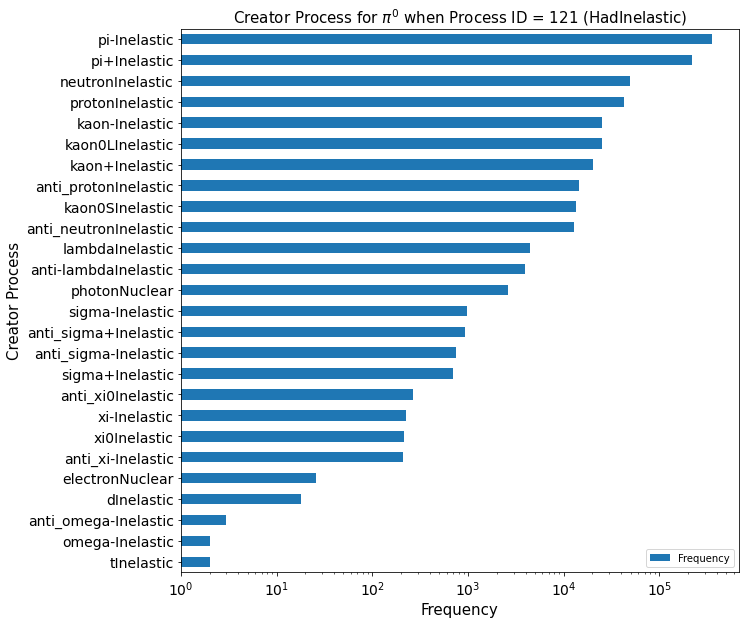

In [16]:
unique_creator_process = np.array(np.unique(np.hstack(df.creator_proc_inelastic_pi0.values), return_counts=True)).T

creator_process = pd.DataFrame(unique_creator_process)
creator_process.columns = ["creator_process", "frequency"]

creator_process['frequency'] = creator_process['frequency'].astype(int)

creator_process = creator_process.sort_values("frequency")#, ascending=False)

creator_process.plot.barh(x = "creator_process", y = "frequency", log=True, figsize=(10,10), fontsize=14, label="Frequency")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Creator Process", fontsize=15)
plt.title("Creator Process for $\pi^{0}$ when Process ID = 121 (HadInelastic)", fontsize=15)

Text(0.5, 1.0, 'Creator Process for $\\pi^{0}$ when Process ID = 151 (HadAtRest)')

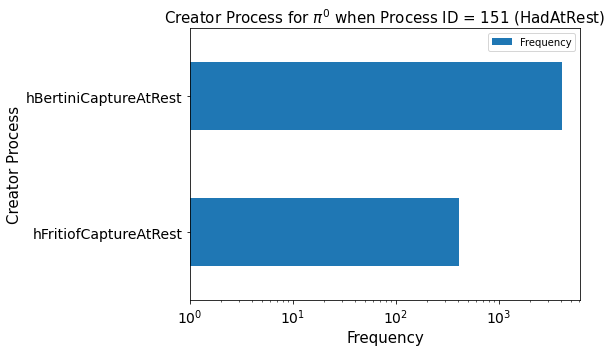

In [17]:
unique_creator_process = np.array(np.unique(np.hstack(df.creator_proc_atRest_pi0.values), return_counts=True)).T

creator_process = pd.DataFrame(unique_creator_process)
creator_process.columns = ["creator_process", "frequency"]

creator_process['frequency'] = creator_process['frequency'].astype(int)

creator_process = creator_process.sort_values("frequency")#, ascending=False)

creator_process.plot.barh(x = "creator_process", y = "frequency", log=True, figsize=(7,5), fontsize=14, label="Frequency")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Creator Process", fontsize=15)
plt.title("Creator Process for $\pi^{0}$ when Process ID = 151 (HadAtRest)", fontsize=15)

Text(0.5, 1.0, 'Creator Process for $\\pi^{0}$ when Process ID = 201 (Decay)')

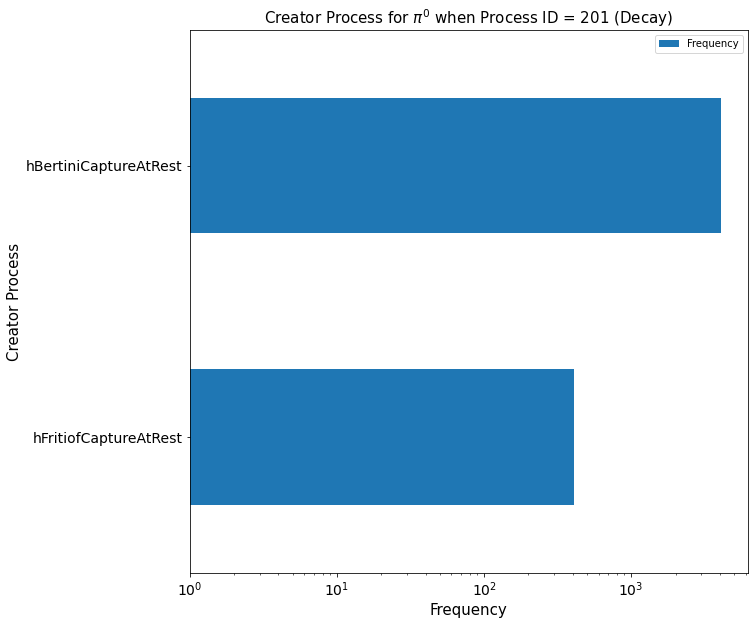

In [18]:
unique_creator_process = np.array(np.unique(np.hstack(df.creator_proc_atRest_pi0.values), return_counts=True)).T

creator_process = pd.DataFrame(unique_creator_process)
creator_process.columns = ["creator_process", "frequency"]

creator_process['frequency'] = creator_process['frequency'].astype(int)

creator_process = creator_process.sort_values("frequency")#, ascending=False)

creator_process.plot.barh(x = "creator_process", y = "frequency", log=True, figsize=(10,10), fontsize=14, label="Frequency")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Creator Process", fontsize=15)
plt.title("Creator Process for $\pi^{0}$ when Process ID = 201 (Decay)", fontsize=15)

In [19]:
e=300
#unique_creator_process_pi0 = np.array(np.unique(np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].creator_proc_pi0.values), return_counts=True)).T
unique_creator_process_pi0 = np.array(np.unique(np.hstack(df.creator_proc_pi0.values), return_counts=True)).T
print(unique_creator_process_pi0[:,0].size)
unique_creator_process_pi0

29


array([['Decay', '146797'],
       ['anti-lambdaInelastic', '3927'],
       ['anti_neutronInelastic', '12854'],
       ['anti_omega-Inelastic', '2'],
       ['anti_protonInelastic', '14503'],
       ['anti_sigma+Inelastic', '939'],
       ['anti_sigma-Inelastic', '744'],
       ['anti_xi-Inelastic', '208'],
       ['anti_xi0Inelastic', '267'],
       ['dInelastic', '17'],
       ['electronNuclear', '1751'],
       ['hBertiniCaptureAtRest', '4091'],
       ['hFritiofCaptureAtRest', '408'],
       ['kaon+Inelastic', '20141'],
       ['kaon-Inelastic', '25476'],
       ['kaon0LInelastic', '25328'],
       ['kaon0SInelastic', '13578'],
       ['lambdaInelastic', '4422'],
       ['neutronInelastic', '49698'],
       ['omega-Inelastic', '1'],
       ['photonNuclear', '2623'],
       ['pi+Inelastic', '217804'],
       ['pi-Inelastic', '357284'],
       ['protonInelastic', '42401'],
       ['sigma+Inelastic', '693'],
       ['sigma-Inelastic', '973'],
       ['tInelastic', '1'],
       ['xi-In

In [20]:
creator_process_df_pi0 = pd.DataFrame(unique_creator_process_pi0)
creator_process_df_pi0.columns = ["creator_process", "frequency"]

creator_process_df_pi0['frequency'] = creator_process_df_pi0['frequency'].astype(int)

creator_process_df_pi0 = creator_process_df_pi0.sort_values("frequency")#, ascending=False)

creator_process_df_pi0.head()

,creator_process,frequency
19,omega-Inelastic,1
26,tInelastic,1
3,anti_omega-Inelastic,2
9,dInelastic,17
7,anti_xi-Inelastic,208


Text(0.5, 1.0, 'Creator Process for $\\pi^{0}$')

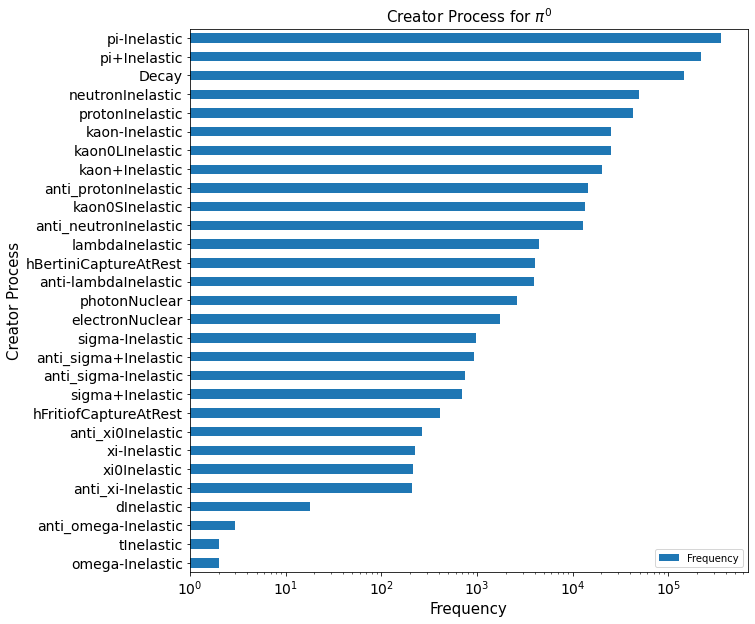

In [21]:
creator_process_df_pi0.plot.barh(x = "creator_process", y = "frequency", log=True, figsize=(10,10), fontsize=14, label="Frequency")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Creator Process", fontsize=15)
plt.title("Creator Process for $\pi^{0}$", fontsize=15)

In [22]:
np.hstack(df.creator_proc_eta.values).size

68802

In [23]:
unique_creator_process_eta = np.array(np.unique(np.hstack(df.creator_proc_eta.values), return_counts=True)).T
print(unique_creator_process_eta[:,0].size)
unique_creator_process_eta

24


array([['Decay', '18319'],
       ['anti-lambdaInelastic', '284'],
       ['anti_neutronInelastic', '943'],
       ['anti_protonInelastic', '1117'],
       ['anti_sigma+Inelastic', '87'],
       ['anti_sigma-Inelastic', '66'],
       ['anti_xi-Inelastic', '12'],
       ['anti_xi0Inelastic', '25'],
       ['hFritiofCaptureAtRest', '35'],
       ['kaon+Inelastic', '1436'],
       ['kaon-Inelastic', '1843'],
       ['kaon0LInelastic', '1465'],
       ['kaon0SInelastic', '1139'],
       ['lambdaInelastic', '166'],
       ['neutronInelastic', '1376'],
       ['omega-Inelastic', '2'],
       ['photonNuclear', '29'],
       ['pi+Inelastic', '10142'],
       ['pi-Inelastic', '28999'],
       ['protonInelastic', '1216'],
       ['sigma+Inelastic', '40'],
       ['sigma-Inelastic', '33'],
       ['xi-Inelastic', '15'],
       ['xi0Inelastic', '13']], dtype='<U32')

In [24]:
creator_process_df_eta = pd.DataFrame(unique_creator_process_eta)
creator_process_df_eta.columns = ["creator_process", "frequency"]

creator_process_df_eta['frequency'] = creator_process_df_eta['frequency'].astype(int)

creator_process_df_eta = creator_process_df_eta.sort_values("frequency")#, ascending=False)

creator_process_df_eta.head()

,creator_process,frequency
15,omega-Inelastic,2
6,anti_xi-Inelastic,12
23,xi0Inelastic,13
22,xi-Inelastic,15
7,anti_xi0Inelastic,25


Text(0.5, 1.0, 'Creator Process for $\\eta$')

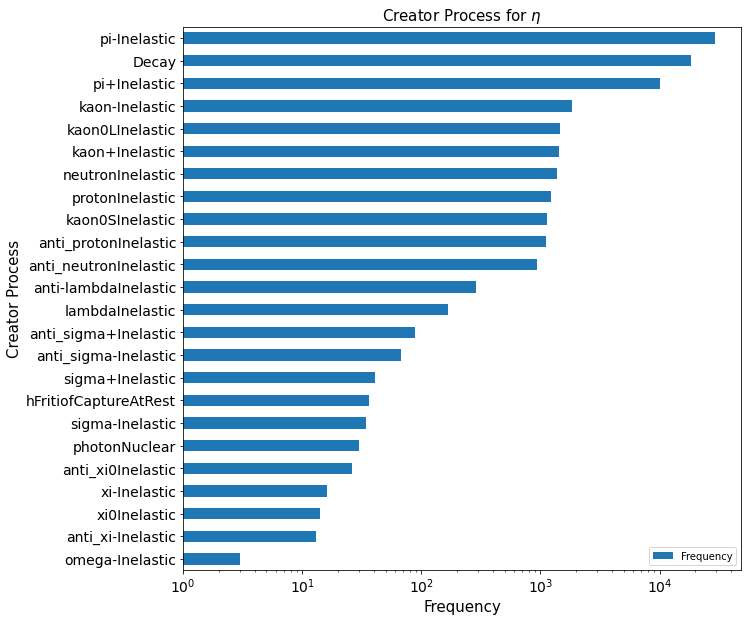

In [25]:
creator_process_df_eta.plot.barh(x = "creator_process", y = "frequency", log=True, figsize=(10,10), fontsize=14, label="Frequency")#, facecolor="g")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Creator Process", fontsize=15)

plt.title("Creator Process for $\eta$", fontsize=15)


In [26]:
def creator_proc_inelastic_eta(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_process_id==121, df_.particle_pdgID==221.0)]

def creator_proc_decay_eta(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_process_id==201, df_.particle_pdgID==221.0)]

def creator_proc_atRest_eta(df_):
    return df_.particle_creator_process_decoded[np.logical_and(df_.particle_process_id==151, df_.particle_pdgID==221.0)]



df["creator_proc_inelastic_eta"] = df.apply(creator_proc_inelastic_eta, axis=1)
df["creator_proc_decay_eta"] = df.apply(creator_proc_decay_eta, axis=1)
df["creator_proc_atRest_eta"] = df.apply(creator_proc_atRest_eta, axis=1)

df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,creator_proc_pi0,creator_proc_eta,creator_proc_pi0_FHI,creator_proc_inelastic_pi0,creator_proc_decay_pi0,creator_proc_atRest_pi0,creator_proc_lt_121_pi0,creator_proc_inelastic_eta,creator_proc_decay_eta,creator_proc_atRest_eta
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-...","[pi-Inelastic, pi-Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay, Decay, Dec...",[hBertiniCaptureAtRest],[],"[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-...",[],[]
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[],"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay]",[],[],[],[],[]
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",[pi-Inelastic],"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay]",[],[],[pi-Inelastic],[],[]
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi+Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay]",[],[],"[pi-Inelastic, pi+Inelastic]",[],[]
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...",[Decay],"[pi-Inelastic, pi-Inelastic, pi-Inelastic]","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...",[],[],[],[],[Decay],[]


Text(0.5, 1.0, 'Creator Process for $\\eta$ when Process ID = 121 (HadInelastic)')

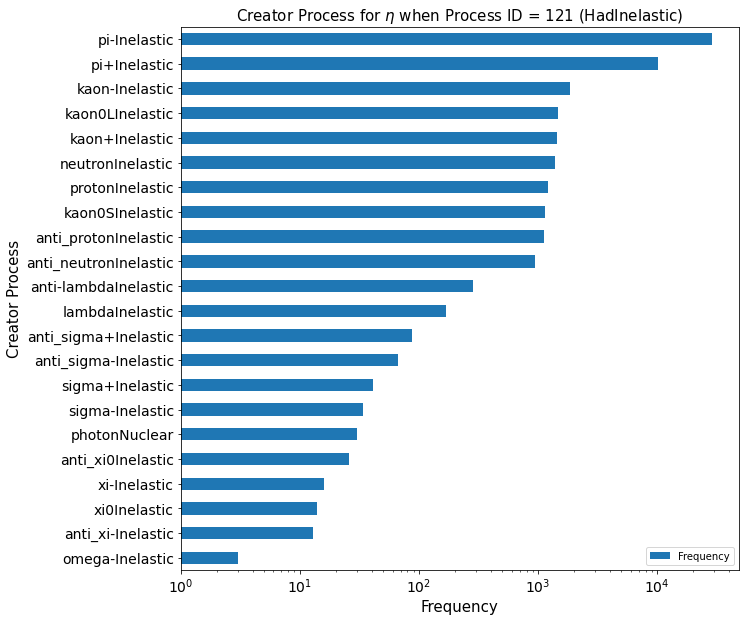

In [27]:
unique_creator_process = np.array(np.unique(np.hstack(df.creator_proc_inelastic_eta.values), return_counts=True)).T

creator_process = pd.DataFrame(unique_creator_process)
creator_process.columns = ["creator_process", "frequency"]

creator_process['frequency'] = creator_process['frequency'].astype(int)

creator_process = creator_process.sort_values("frequency")#, ascending=False)

creator_process.plot.barh(x = "creator_process", y = "frequency", log=True, figsize=(10,10), fontsize=14, label="Frequency")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Creator Process", fontsize=15)
plt.title("Creator Process for $\eta$ when Process ID = 121 (HadInelastic)", fontsize=15)

In [28]:
np.array(np.unique(np.hstack(df.creator_proc_atRest_eta.values), return_counts=True)).T



array([['hFritiofCaptureAtRest', '35']], dtype='<U32')

In [29]:
np.array(np.unique(np.hstack(df.creator_proc_decay_eta.values), return_counts=True)).T

array([['Decay', '18319']], dtype='<U32')

In [30]:
def kin_sum_pi0_frac(df_):
    return np.sum(df_.particle_kin[np.logical_and(df_.particle_pdgID==111.0, df_.particle_process_id>=121)])/df_.genEn

def kin_sum_eta_frac(df_):
    return np.sum(df_.particle_kin[df_.particle_pdgID==221.0])/df_.genEn

def kin_sum_all_frac(df_):
    return np.sum(df_.particle_kin)/df_.genEn

In [31]:
df["kin_sum_pi0_frac"] = df.apply(kin_sum_pi0_frac, axis=1)
df["kin_sum_eta_frac"] = df.apply(kin_sum_eta_frac, axis=1)
df["kin_sum_all_frac"] = df.apply(kin_sum_all_frac, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,creator_proc_inelastic_pi0,creator_proc_decay_pi0,creator_proc_atRest_pi0,creator_proc_lt_121_pi0,creator_proc_inelastic_eta,creator_proc_decay_eta,creator_proc_atRest_eta,kin_sum_pi0_frac,kin_sum_eta_frac,kin_sum_all_frac
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay, Decay, Dec...",[hBertiniCaptureAtRest],[],"[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-...",[],[],0.498862,0.169635,0.668497
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay]",[],[],[],[],[],0.474118,0.000000,0.474118
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay]",[],[],[pi-Inelastic],[],[],0.621005,0.281765,0.902770
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...","[Decay, Decay, Decay, Decay, Decay]",[],[],"[pi-Inelastic, pi+Inelastic]",[],[],0.357444,0.181471,0.538915
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi+...",[],[],[],[],[Decay],[],0.425016,0.051977,0.476994


In [32]:
def pi0_process_id(df_):
    return df_.particle_process_id[df_.particle_pdgID==111]

def eta_process_id(df_):
    return df_.particle_process_id[df_.particle_pdgID==221]

In [33]:
df["pi0_process_id"] = df.apply(pi0_process_id, axis=1)
df["eta_process_id"] = df.apply(eta_process_id, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,creator_proc_atRest_pi0,creator_proc_lt_121_pi0,creator_proc_inelastic_eta,creator_proc_decay_eta,creator_proc_atRest_eta,kin_sum_pi0_frac,kin_sum_eta_frac,kin_sum_all_frac,pi0_process_id,eta_process_id
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,[hBertiniCaptureAtRest],[],"[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-...",[],[],0.498862,0.169635,0.668497,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 201...","[121.0, 121.0, 121.0, 121.0]"
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,[],[],[],[],[],0.474118,0.000000,0.474118,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...",[]
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,[],[],[pi-Inelastic],[],[],0.621005,0.281765,0.902770,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...",[121.0]
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,[],[],"[pi-Inelastic, pi+Inelastic]",[],[],0.357444,0.181471,0.538915,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[121.0, 121.0]"
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,[],[],[],[Decay],[],0.425016,0.051977,0.476994,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...",[201.0]


In [34]:
def updated_particle_z(df_):
    return df_.particle_z-df_.int_z

df["updated_particle_z"] = df.apply(updated_particle_z, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,creator_proc_lt_121_pi0,creator_proc_inelastic_eta,creator_proc_decay_eta,creator_proc_atRest_eta,kin_sum_pi0_frac,kin_sum_eta_frac,kin_sum_all_frac,pi0_process_id,eta_process_id,updated_particle_z
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,[],"[pi-Inelastic, pi+Inelastic, pi+Inelastic, pi-...",[],[],0.498862,0.169635,0.668497,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 201...","[121.0, 121.0, 121.0, 121.0]","[0.0, 0.0, 33.855865, 33.855865, 33.855865, 33..."
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,[],[],[],[],0.474118,0.000000,0.474118,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...",[],"[0.0, 0.0, 0.0, 0.0, 17.529755, 8.48938, 74.59..."
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,[],[pi-Inelastic],[],[],0.621005,0.281765,0.902770,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...",[121.0],"[0.0, 0.0, 0.0, 0.0, 0.0, 69.1965, 69.1965, 69..."
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,[],"[pi-Inelastic, pi+Inelastic]",[],[],0.357444,0.181471,0.538915,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[121.0, 121.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.04706, ..."
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,[],[],[Decay],[],0.425016,0.051977,0.476994,"[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...",[201.0],"[0.0, 0.0, 0.0, 18.762054, 19.200562, 43.16122..."


In [55]:
def frac_first_ene_pi0_firstHadInt(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==111.0])/df_.genEn

def frac_first_ene_pi0(df_):  
    
    bool_pdgID = (df_.particle_pdgID==111.0)
    bool_parent_id = (df_.particle_parent_id<=0)
    bool_process_id = (df_.particle_process_id>=121)
    
    and_bool = bool_pdgID*bool_parent_id*bool_process_id
    
    return np.sum(df_.particle_kin[and_bool])/df_.genEn
    
def frac_rest_ene_pi0(df_):  
    
    bool_pdgID = (df_.particle_pdgID==111.0)
    bool_parent_id = (df_.particle_parent_id>0)
    bool_process_id = (df_.particle_process_id>=121)
    
    and_bool = bool_pdgID*bool_parent_id*bool_process_id
    
    return np.sum(df_.particle_kin[and_bool])/df_.genEn

In [56]:
df["frac_first_ene_pi0_firstHadInt"] = df.apply(frac_first_ene_pi0_firstHadInt, axis=1)
df["frac_first_ene_pi0"] = df.apply(frac_first_ene_pi0, axis=1)
df["frac_rest_ene_pi0"] = df.apply(frac_rest_ene_pi0, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,updated_particle_z,frac_first_ene_pi0_firstHadInt,frac_first_ene_pi0,frac_rest_ene_pi0,bool_all_pi0,bool_first_pi0,bool_late_pi0,precess_lt_121_count,precess_gt_121_count,lead_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[0.0, 0.0, 33.855865, 33.855865, 33.855865, 33...",0.062468,0.062468,0.436395,1,1,1,0,1,-1.00000
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[0.0, 0.0, 0.0, 0.0, 17.529755, 8.48938, 74.59...",0.304355,0.304355,0.169763,1,1,1,0,0,-1.00000
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 69.1965, 69.1965, 69...",0.193265,0.193265,0.427740,1,1,1,0,0,-1.00000
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.04706, ...",0.208471,0.208471,0.148973,1,1,1,0,0,-1.00000
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[0.0, 0.0, 0.0, 18.762054, 19.200562, 43.16122...",0.230361,0.230361,0.194655,1,1,1,0,0,0.19018


In [57]:
def bool_all_pi0(df_):
    bool_sum = np.sum(df_.particle_pdgID==111.0)
        
    if bool_sum>0:
        return 1
    
    else:
        return 0

def bool_first_pi0(df_):
    bool_sum = np.sum(np.logical_and(df_.particle_pdgID==111.0, df_.particle_parent_id<=0))
        
    if bool_sum>0:
        return 1
    
    else:
        return 0
    
def bool_late_pi0(df_):  
    bool_sum = np.sum(np.logical_and(df_.particle_pdgID==111.0, df_.particle_parent_id>0))
        
    if bool_sum>0:
        return 1
    
    else:
        return 0

In [58]:
df["bool_all_pi0"] = df.apply(bool_all_pi0, axis=1)
df["bool_first_pi0"] = df.apply(bool_first_pi0, axis=1)
df["bool_late_pi0"] = df.apply(bool_late_pi0, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,updated_particle_z,frac_first_ene_pi0_firstHadInt,frac_first_ene_pi0,frac_rest_ene_pi0,bool_all_pi0,bool_first_pi0,bool_late_pi0,precess_lt_121_count,precess_gt_121_count,lead_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[0.0, 0.0, 33.855865, 33.855865, 33.855865, 33...",0.062468,0.062468,0.436395,1,1,1,0,1,-1.00000
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[0.0, 0.0, 0.0, 0.0, 17.529755, 8.48938, 74.59...",0.304355,0.304355,0.169763,1,1,1,0,0,-1.00000
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 69.1965, 69.1965, 69...",0.193265,0.193265,0.427740,1,1,1,0,0,-1.00000
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.04706, ...",0.208471,0.208471,0.148973,1,1,1,0,0,-1.00000
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[0.0, 0.0, 0.0, 18.762054, 19.200562, 43.16122...",0.230361,0.230361,0.194655,1,1,1,0,0,0.19018


In [59]:
def precess_lt_121_count(df_):
    return np.sum(df_.particle_process_id<121)

def precess_gt_121_count(df_):
    return np.sum(df_.particle_process_id==151)

df["precess_lt_121_count"] = df.apply(precess_lt_121_count, axis=1)
df["precess_gt_121_count"] = df.apply(precess_gt_121_count, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,updated_particle_z,frac_first_ene_pi0_firstHadInt,frac_first_ene_pi0,frac_rest_ene_pi0,bool_all_pi0,bool_first_pi0,bool_late_pi0,precess_lt_121_count,precess_gt_121_count,lead_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[0.0, 0.0, 33.855865, 33.855865, 33.855865, 33...",0.062468,0.062468,0.436395,1,1,1,0,1,-1.00000
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[0.0, 0.0, 0.0, 0.0, 17.529755, 8.48938, 74.59...",0.304355,0.304355,0.169763,1,1,1,0,0,-1.00000
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 69.1965, 69.1965, 69...",0.193265,0.193265,0.427740,1,1,1,0,0,-1.00000
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.04706, ...",0.208471,0.208471,0.148973,1,1,1,0,0,-1.00000
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[0.0, 0.0, 0.0, 18.762054, 19.200562, 43.16122...",0.230361,0.230361,0.194655,1,1,1,0,0,0.19018


In [60]:
def lead_pi0(df_):
    
    max_ene_sec = np.max(df_.sec_kin)
    
    max_ene_sec_pdgID = np.sum(df_.sec_pdgID[df_.sec_kin==max_ene_sec])
    #print((max_ene_sec_pdgID))
    
    if max_ene_sec_pdgID==111.0: return max_ene_sec/df_.genEn
    
    else: return -1

df["lead_pi0"] = df.apply(lead_pi0, axis=1)
df.head()

,genEn,nSec,sec_pdgID,sec_charge,sec_kin,int_x,int_y,int_z,nparticle,particle_x,...,updated_particle_z,frac_first_ene_pi0_firstHadInt,frac_first_ene_pi0,frac_rest_ene_pi0,bool_all_pi0,bool_first_pi0,bool_late_pi0,precess_lt_121_count,precess_gt_121_count,lead_pi0
entry,,,,,,,,,,,,,,,,,,,,,
0,100.138634,24,"[1000290600.0, 1000822100.0, 2112.0, -211.0, 2...","[29.0, 82.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0...","[1.1208658e-05, 7.1298084e-05, 0.15728179, 0.4...",-86.572929,-50.379963,369.165131,42,"[-86.57293, -86.57293, -94.54583, -94.54583, -...",...,"[0.0, 0.0, 33.855865, 33.855865, 33.855865, 33...",0.062468,0.062468,0.436395,1,1,1,0,1,-1.00000
1,100.138840,46,"[130.0, 130.0, -211.0, 111.0, 2212.0, 2112.0, ...","[0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, -1.0, 0.0...","[19.5468, 1.7077374, 11.634573, 17.569706, 0.0...",11.723857,-87.761345,323.284760,40,"[11.723857, 11.723857, 11.723857, 11.723857, 1...",...,"[0.0, 0.0, 0.0, 0.0, 17.529755, 8.48938, 74.59...",0.304355,0.304355,0.169763,1,1,1,0,0,-1.00000
2,100.138802,66,"[221.0, -211.0, 111.0, 2112.0, 321.0, -321.0, ...","[0.0, -1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1...","[28.215618, 3.7649243, 12.31474, 1.2813426, 4....",-65.979294,55.050060,321.536194,27,"[-65.979294, -65.979294, -65.979294, -65.97929...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 69.1965, 69.1965, 69...",0.193265,0.193265,0.427740,1,1,1,0,0,-1.00000
3,100.138718,42,"[-211.0, 2212.0, -211.0, 331.0, 111.0, -211.0,...","[-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0....","[8.166038, 17.704084, 2.717988, 5.2729654, 6.6...",-26.034641,-89.628159,343.203491,37,"[-26.034641, -26.034641, -26.034641, -26.03464...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.04706, ...",0.208471,0.208471,0.148973,1,1,1,0,0,-1.00000
4,100.138870,41,"[111.0, -211.0, 211.0, 130.0, -2112.0, -211.0,...","[0.0, -1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, -1....","[19.044394, 9.861228, 0.336922, 1.1848624, 17....",1.972609,-96.587456,349.693329,22,"[1.9726087, 1.9726087, 1.9726087, 2.099506, 2....",...,"[0.0, 0.0, 0.0, 18.762054, 19.200562, 43.16122...",0.230361,0.230361,0.194655,1,1,1,0,0,0.19018


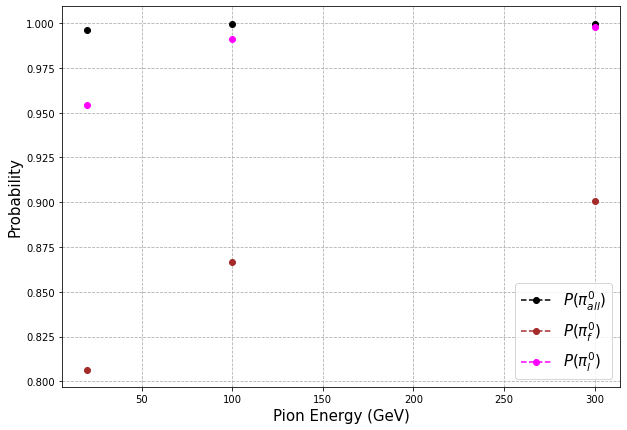

In [61]:
ene = [20, 50, 80, 100, 120, 200, 250, 300]

pi0_prob_all = []
pi0_prob_first = []
pi0_prob_late = []

for e in ene:
    pi0_prob_all.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_all_pi0.values))
    pi0_prob_first.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_first_pi0.values))
    pi0_prob_late.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].bool_late_pi0.values))
    
plt.figure(figsize=[10,7])

plt.plot(ene, pi0_prob_all, ".b", markersize=12, color="black", linestyle="--", label="$P(\pi^{0}_{all})$" )
plt.plot(ene, pi0_prob_first, ".b", markersize=12, color="brown",linestyle="--", label="$P(\pi^{0}_{f})$")
plt.plot(ene, pi0_prob_late, ".g", markersize=12, color="magenta", linestyle="--", label="$P(\pi^{0}_{l})$")

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Probability", fontsize=15)

plt.grid(linestyle="--")
plt.legend(fontsize=15)
#plt.xscale("log")

In [62]:
pi0_prob_late

[0.9545553381169819,
 nan,
 nan,
 0.9912917271407837,
 nan,
 nan,
 nan,
 0.9981258053180274]

In [63]:
pi0_prob_late

[0.9545553381169819,
 nan,
 nan,
 0.9912917271407837,
 nan,
 nan,
 nan,
 0.9981258053180274]

In [64]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} created in first hadronic interaction; #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)


e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        

        
H_pion.Draw()


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [65]:
c=ROOT.TCanvas()

bins=100
xmin=0
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by the leading #pi^{0} in first hadronic interaction; #pi^{0}_{lead};Normalized Entries", bins,xmin,xmax)


e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].lead_pi0.values
for i in range(x.size):
       if x[i]>-1: H_pion.Fill(x[i])
        

        
H_pion.Draw()


#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [66]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} created in first hadronic interaction; #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)


e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z<330.7) & (df.int_z>324.4)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        

        
H_pion.Draw()


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [67]:
c=ROOT.TCanvas()

bins=100
xmin=-0.02
xmax=1.02

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} in a 100 GeV pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by all #pi^{0} in a 100 GeV pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)

e=300


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0_firstHadInt.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values



for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion1.Fill(y[i])
        
H_pion1.SetLineColor(2)        

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","firstHadInt","l");
legend.AddEntry("H_pion1","FromProcessID","l");


legend.Draw();

ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [68]:
c=ROOT.TCanvas()

bins=100
xmin=200
xmax=550

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #eta in a 100 GeV pion shower; #eta_{all_frac};Normalized Entries", bins,xmin,xmax)

e=100


x = np.hstack(df.int_z.values)

for i in range(x.size):
        H_pion.Fill(x[i])
        
        
H_pion.Draw()
ROOT.gPad.SetLogy()
c.Draw()


print(np.unique(x))

[ 94.90122  125.472275 299.213    ... 514.4386   514.4753   517.0494  ]


Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [69]:
unique_process_pi0 = np.array(np.unique(np.hstack(df.pi0_process_id.values), return_counts=True)).T
print(unique_process_pi0[:,0].size)



process_df_pi0 = pd.DataFrame(unique_process_pi0)
process_df_pi0.columns = ["process_id", "frequency"]

process_df_pi0['frequency'] = process_df_pi0['frequency'].astype(int)

process_df_pi0 = process_df_pi0.sort_values("frequency")#, ascending=False)

process_df_pi0["process_name"] = ["CoulombScat (ID=1.0)", "Annih (ID=5.0)", "Msc (ID=10.0)", "Transportation (ID=91.0)", "Ionisation (ID=2.0)", "Brems (ID=3.0)", "HadAtRest (ID=151.0)", "Decay (ID=201.0)", "HadInelastic (ID=121.0)"]

process_df_pi0




9


,process_id,frequency,process_name
0,1.0,2,CoulombScat (ID=1.0)
3,5.0,11,Annih (ID=5.0)
4,10.0,23,Msc (ID=10.0)
5,91.0,448,Transportation (ID=91.0)
1,2.0,512,Ionisation (ID=2.0)
2,3.0,730,Brems (ID=3.0)
7,151.0,4499,HadAtRest (ID=151.0)
8,201.0,146797,Decay (ID=201.0)
6,121.0,794347,HadInelastic (ID=121.0)


Text(0.5, 1.0, 'Process IDs of $\\pi^{0}$')

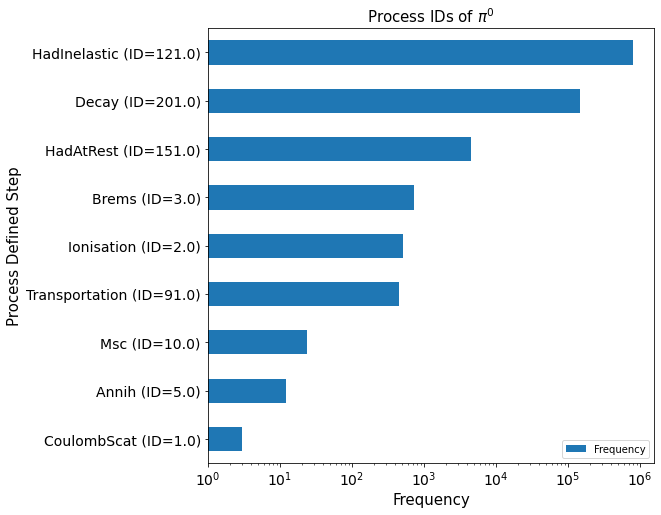

In [70]:
process_df_pi0.plot.barh(x = "process_name", y = "frequency", log=True, figsize=(8,8), fontsize=14, label="Frequency")#, facecolor="g")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Process Defined Step", fontsize=15)

plt.title("Process IDs of $\pi^{0}$", fontsize=15)

In [71]:
np.hstack(df.eta_process_id.values).size

68802

In [72]:
unique_process_eta = np.array(np.unique(np.hstack(df.eta_process_id.values), return_counts=True)).T
print(unique_process_eta[:,0].size)



process_df_eta = pd.DataFrame(unique_process_eta)
process_df_eta.columns = ["process_id", "frequency"]

process_df_eta['frequency'] = process_df_eta['frequency'].astype(int)

process_df_eta = process_df_eta.sort_values("frequency")#, ascending=False)

process_df_eta["process_name"] = ["HadAtRest (ID=151.0)", "Decay (ID=201.0)", "HadInelastic (ID=121.0)"]

process_df_eta

3


,process_id,frequency,process_name
1,151.0,35,HadAtRest (ID=151.0)
2,201.0,18319,Decay (ID=201.0)
0,121.0,50448,HadInelastic (ID=121.0)


Text(0.5, 1.0, 'Process IDs of $\\eta$')

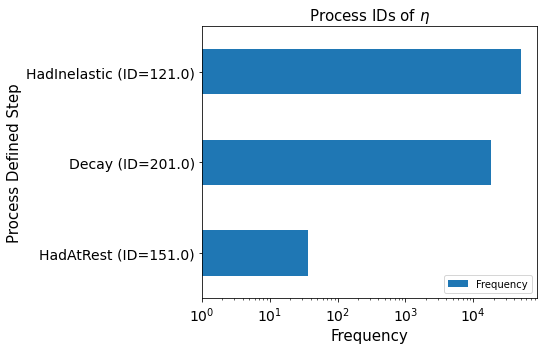

In [73]:
process_df_eta.plot.barh(x = "process_name", y = "frequency", log=True, figsize=(6,5), fontsize=14, label="Frequency")#, facecolor="g")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Process Defined Step", fontsize=15)

plt.title("Process IDs of $\eta$", fontsize=15)

In [74]:
c=ROOT.TCanvas()

bins=100
xmin=-10
xmax=250

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Process IDs for #pi^{0}; Process ID;Entries", bins,xmin,xmax)

e=100


x = np.hstack(df.pi0_process_id.values)

for i in range(x.size):
        H_pion.Fill(x[i])
        
        
H_pion.Draw()
ROOT.gPad.SetLogy()
c.Draw()


print(np.unique(x))

[  1.   2.   3.   5.  10.  91. 121. 151. 201.]


Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


24


Text(0, 0.5, 'Creator Process')

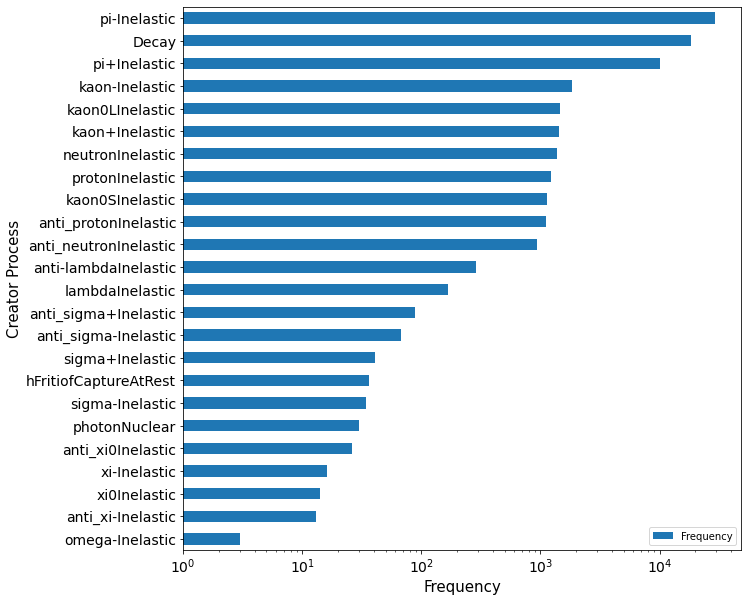

In [75]:
unique_creator_process_eta = np.array(np.unique(np.hstack(df.creator_proc_eta.values), return_counts=True)).T
print(unique_creator_process_eta[:,0].size)
unique_creator_process_eta


creator_process_df_eta = pd.DataFrame(unique_creator_process_eta)
creator_process_df_eta.columns = ["creator_process", "frequency"]

creator_process_df_eta['frequency'] = creator_process_df_eta['frequency'].astype(int)

creator_process_df_eta = creator_process_df_eta.sort_values("frequency")#, ascending=False)

creator_process_df_eta.head()


creator_process_df_eta.plot.barh(x = "creator_process", y = "frequency", log=True, figsize=(10,10), fontsize=14, label="Frequency")#, facecolor="g")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Creator Process", fontsize=15)

In [76]:
c=ROOT.TCanvas()

bins=100
xmin=0
xmax=250

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Process IDs for #eta; Process ID;Entries", bins,xmin,xmax)

e=100


x = np.hstack(df.eta_process_id.values)

for i in range(x.size):
        H_pion.Fill(x[i])
        
        
H_pion.Draw()
ROOT.gPad.SetLogy()
c.Draw()


print(np.unique(x))

[121. 151. 201.]


Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [77]:
df_gre = df.loc[df.kin_sum_eta_frac>1]
#df_gre = df.loc[df.precess_lt_121_count>0]
df_gre[["particle_parent_id", "particle_track_id", "particle_kin", "particle_process_id", "particle_creator_process_decoded", "kin_sum_pi0_frac", "kin_sum_eta_frac", "genEn"]]

,particle_parent_id,particle_track_id,particle_kin,particle_process_id,particle_creator_process_decoded,kin_sum_pi0_frac,kin_sum_eta_frac,genEn
entry,,,,,,,,
442,"[0.0, 0.0, 1.0, 727.0, 727.0, 727.0, 25562.0, ...","[1.0, 1.0, 144.0, 25562.0, 25562.0, 25562.0, 2...","[1.0685658, 96.81013, 9.847089, 0.39844427, 5....","[121.0, 121.0, 201.0, 121.0, 121.0, 121.0, 201...","[pi-Inelastic, pi-Inelastic, Decay, pi-Inelast...",0.404439,1.028087,100.138847
1604,"[0.0, 0.0, 1.0, 95.0, 95.0, 4049.0, 4049.0, 83...","[1.0, 1.0, 95.0, 4049.0, 4049.0, 83869.0, 8386...","[94.97123, 0.78883374, 32.306786, 8.208072, 1....","[121.0, 121.0, 201.0, 121.0, 121.0, 121.0, 121...","[pi-Inelastic, pi-Inelastic, Decay, pi-Inelast...",0.634217,1.030364,100.138733
2253,"[0.0, 0.0, 1.0, 123.0, 123.0, 123.0, 123.0, 12...","[1.0, 1.0, 123.0, 894.0, 894.0, 894.0, 894.0, ...","[0.2001323, 88.01016, 21.83383, 2.3451176, 0.6...","[121.0, 121.0, 201.0, 121.0, 121.0, 121.0, 121...","[pi-Inelastic, pi-Inelastic, Decay, pi-Inelast...",0.540767,1.020739,100.138870
2625,"[1.0, 1.0, 1.0, 224.0, 224.0, 224.0, 37036.0, ...","[148.0, 148.0, 148.0, 11942.0, 11942.0, 11942....","[89.48719, 1.51118, 0.23000215, 1.2045993, 1.4...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",0.615308,1.434969,100.138885
2705,"[0.0, 0.0, 0.0, 1.0, 1.0, 86.0, 86.0, 86.0, 86...","[1.0, 1.0, 1.0, 88.0, 86.0, 3286.0, 3285.0, 32...","[0.15003449, 97.3726, 0.18790297, 0.05988176, ...","[121.0, 121.0, 121.0, 121.0, 201.0, 121.0, 121...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",0.461022,1.160732,100.138954
2775,"[0.0, 1.0, 247.0, 247.0, 247.0, 247.0, 504.0, ...","[1.0, 247.0, 504.0, 504.0, 504.0, 504.0, 47994...","[95.986824, 20.860022, 3.624082, 0.32016164, 2...","[121.0, 201.0, 121.0, 121.0, 121.0, 121.0, 121...","[pi-Inelastic, Decay, pi-Inelastic, pi-Inelast...",0.540417,1.057121,100.138817
3291,"[0.0, 0.0, 1.0, 288.0, 288.0, 423.0, 423.0, 42...","[1.0, 1.0, 288.0, 423.0, 423.0, 115208.0, 1152...","[0.56732523, 97.05506, 49.726883, 1.9471087, 1...","[121.0, 121.0, 201.0, 121.0, 121.0, 121.0, 121...","[pi-Inelastic, pi-Inelastic, Decay, pi-Inelast...",0.603655,1.012948,100.138847
6928,"[0.0, 0.0, 45.0, 45.0, 675.0, 675.0, 34074.0, ...","[1.0, 1.0, 675.0, 675.0, 16786.0, 16784.0, 418...","[9.000424, 79.11629, 2.4833274, 0.8646808, 0.9...","[121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 201...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",0.227626,1.003520,100.138878
8749,"[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 6426.0, 64...","[1.0, 1.0, 1.0, 98.0, 96.0, 96.0, 96.0, 56865....","[0.20354931, 94.394424, 1.9678334, 0.07259962,...","[121.0, 121.0, 121.0, 121.0, 201.0, 201.0, 201...","[pi-Inelastic, pi-Inelastic, pi-Inelastic, pi-...",1.108437,1.028582,100.138748


In [78]:
df_gre.kin_sum_pi0_frac.values.size

20

In [79]:
df_gre.genEn.values.size

20

In [80]:
max(df_gre.kin_sum_eta_frac.values)

1.434969315992102

In [81]:
min(df_gre.kin_sum_eta_frac.values)

1.000846513982871

In [82]:
df.genEn.values.size

26692

In [83]:
n=4
df_gre.particle_parent_id.values[n]

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
       8.60000e+01, 8.60000e+01, 8.60000e+01, 8.60000e+01, 8.60000e+01,
       8.60000e+01, 3.28500e+03, 3.28500e+03, 3.28500e+03, 9.89600e+04,
       1.07706e+05, 3.28500e+03, 9.89550e+04, 9.89550e+04, 1.58979e+05,
       9.89550e+04, 1.56101e+05, 3.28500e+03, 3.28500e+03, 1.87431e+05],
      dtype=float32)

In [84]:
df_gre.particle_track_id.values[n]

array([1.00000e+00, 1.00000e+00, 1.00000e+00, 8.80000e+01, 8.60000e+01,
       3.28600e+03, 3.28500e+03, 3.28500e+03, 3.28500e+03, 3.28500e+03,
       3.28500e+03, 9.89600e+04, 9.89600e+04, 9.89600e+04, 1.07708e+05,
       1.16216e+05, 9.89550e+04, 1.56102e+05, 1.56102e+05, 1.59480e+05,
       1.56101e+05, 1.60905e+05, 9.89540e+04, 9.89540e+04, 1.98892e+05],
      dtype=float32)

In [ ]:
df_gre.particle_process_id.values[n]#[df_gre.particle_process_id.values[n]<121]

In [ ]:
df_gre.particle_kin.values[n][df_gre.particle_pdgID.values[n]==221]

In [ ]:
df_gre.particle_creator_process_decoded.values[n]#[df_gre.particle_process_id.values[n]<121]#[df_gre.particle_creator_process_decoded.values[n]=="Decay"]

In [ ]:
df_gre.particle_pdgID.values[n]

In [ ]:
kin_sum = 0.0
for i in range(df_gre.particle_kin.values[n].size):
    
    if df_gre.particle_pdgID.values[n][i]==111.0:
    
        if (df_gre.particle_creator_process_decoded.values[n][i]=="photonNuclear") or (df_gre.particle_creator_process_decoded.values[n][i]=="Decay") : continue
            
        kin_sum += df_gre.particle_kin.values[n][i]
            
kin_sum

In [ ]:
df_gre.kin_sum_pi0_frac.values[n]#[df_gre.particle_creator_process_decoded.values[n]=="electronNuclear"]

In [ ]:
df_gre.particle_pdgID.values[n]#[df_gre.particle_creator_process_decoded.values[n]=="Decay"]

In [125]:
df_gre.particle_y.values[n]

array([57.912983, 57.912983, 58.53975 , 58.53975 , 58.53975 , 61.152668,
       61.152668, 61.152668, 61.152668, 61.152668, 64.3657  , 52.473457],
      dtype=float32)

In [126]:
df_gre.particle_z.values[n]

array([374.09247, 374.09247, 378.15125, 378.15125, 378.15125, 395.0797 ,
       395.0797 , 395.0797 , 395.0797 , 395.0797 , 416.03473, 387.39908],
      dtype=float32)

In [85]:
def leading_eta_kin_ene_frac(df_):
    
    if df_.particle_kin[df_.particle_pdgID==221].size==0:
        return 0
    
    else:
        return np.max(df_.particle_kin[df_.particle_pdgID==221])/df_.genEn

df_gre.apply(leading_eta_kin_ene_frac, axis=1)

entry
442      0.966759
1604     0.948397
2253     0.878881
2625     0.893631
2705     0.972375
2775     0.958538
3291     0.969205
6928     0.790066
8749     0.942636
9224     0.943023
9582     0.767962
12614    0.886496
17482    0.908668
18594    0.764599
19055    0.969244
19781    0.984791
23689    0.790807
24366    0.793533
26465    0.981811
26587    0.993841
dtype: float64

In [86]:
c=ROOT.TCanvas()

bins=50
xmin=0.6
xmax=1.02

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by leading #eta ; #eta_{lead};Normalized Entries", bins,xmin,xmax)



x = df_gre.apply(leading_eta_kin_ene_frac, axis=1).values


for i in range(x.size):
        H_pion.Fill(x[i])
        

H_pion.DrawNormalized()


ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [87]:
c=ROOT.TCanvas()

bins=100
xmin=-0.02
xmax=1.02

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} in a 100 GeV pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by all #pi^{0} in a 100 GeV pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)

e=20


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values



for i in range(x.size):
        H_pion.Fill(x[i])
        
for i in range(y.size):
        H_pion1.Fill(y[i])
        
H_pion1.SetLineColor(2)        

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","firstHadInt","l");
legend.AddEntry("H_pion1","rest","l");


legend.Draw();

ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).


In [88]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized Entries", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).


In [89]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} created in later part of pion shower; #pi^{0}_{l};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} created in rest of pion shower; #pi^{0}_{frac_rest};Normalized Entries", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} created in rest of pion shower; #pi^{0}_{frac_rest};Normalized Entries", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion2.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [103]:
c=ROOT.TCanvas()

bins=150
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","#pi^{0}_{l} v/s #pi^{0}_{f}; #pi^{0}_{f};#pi^{0}_{l}", bins,xmin,xmax, bins,xmin,xmax)

e=20


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [104]:
c=ROOT.TCanvas()

bins=150
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","#pi^{0}_{l} v/s #pi^{0}_{f}; #pi^{0}_{f};#pi^{0}_{l}", bins,xmin,xmax, bins,xmin,xmax)

e=100


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [105]:
c=ROOT.TCanvas()

bins=150
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","#pi^{0}_{l} v/s #pi^{0}_{f}; #pi^{0}_{f};#pi^{0}_{l}", bins,xmin,xmax, bins,xmin,xmax)

e=300


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values
y = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [98]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all};Normalized Entries", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).


/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/cvmfs/sft.cern.ch/lcg/views/LCG_99cuda/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


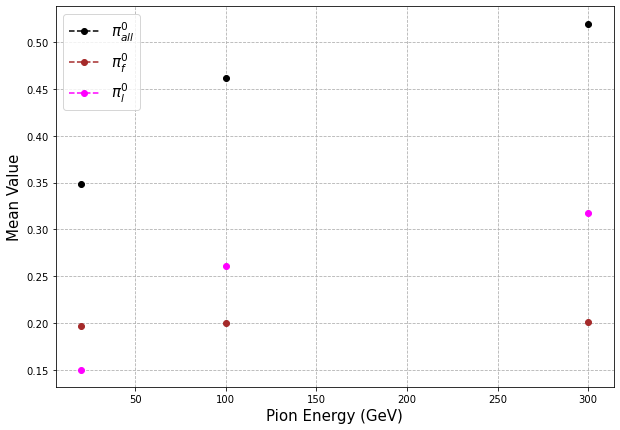

In [133]:
ene = [20, 50, 80, 100, 120, 200, 250, 300]

pi0_frac_all = []
pi0_frac_first = []
pi0_frac_late = []

for e in ene:
    pi0_frac_all.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values))
    pi0_frac_first.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values))
    pi0_frac_late.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values))
    
plt.figure(figsize=[10,7])

plt.plot(ene, pi0_frac_all, ".b", markersize=12, color="black", linestyle="--", label="$\pi^{0}_{all}$" )
plt.plot(ene, pi0_frac_first, ".b", markersize=12, color="brown",linestyle="--", label="$\pi^{0}_{f}$")
plt.plot(ene, pi0_frac_late, ".g", markersize=12, color="magenta", linestyle="--", label="$\pi^{0}_{l}$")

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Mean Value", fontsize=15)

plt.grid(linestyle="--")
plt.legend(fontsize=15)
#plt.xscale("log")

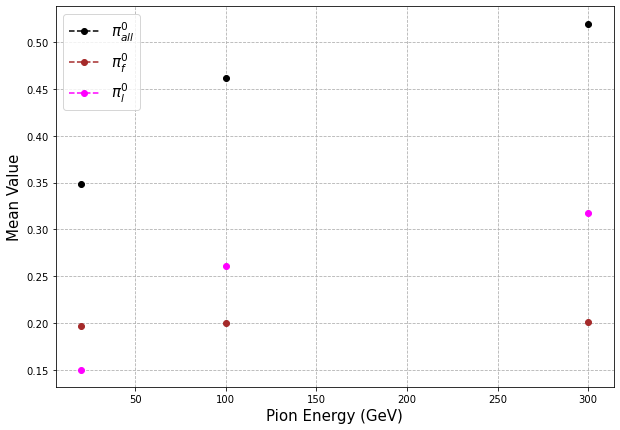

In [134]:
ene = [20, 50, 80, 100, 120, 200, 250, 300]

pi0_frac_all = []
pi0_frac_first = []
pi0_frac_late = []

for e in ene:
    pi0_frac_all.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values))
    pi0_frac_first.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_first_ene_pi0.values))
    pi0_frac_late.append(np.mean(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].frac_rest_ene_pi0.values))
    
plt.figure(figsize=[10,7])

plt.plot(ene, pi0_frac_all, ".b", markersize=12, color="black", linestyle="--", label="$\pi^{0}_{all}$" )
plt.plot(ene, pi0_frac_first, ".b", markersize=12, color="brown",linestyle="--", label="$\pi^{0}_{f}$")
plt.plot(ene, pi0_frac_late, ".g", markersize=12, color="magenta", linestyle="--", label="$\pi^{0}_{l}$")

plt.xlabel("Pion Energy (GeV)", fontsize=15)
plt.ylabel("Mean Value", fontsize=15)

plt.grid(linestyle="--")
plt.legend(fontsize=15)
#plt.xscale("log")

In [135]:
c=ROOT.TCanvas()

bins=150
xmin=-260
xmax=260

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; x (cm);y (cm)", bins,xmin,xmax, bins,xmin,xmax)

e=100
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)
particle_y = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_y.values)

x = particle_x
y = particle_y

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [136]:
c=ROOT.TCanvas()

bins=150
xmin=-260
xmax=260

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; x (cm);y (cm)", bins,xmin,xmax, bins,xmin,xmax)

e=20
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)
particle_y = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_y.values)

x = particle_x
y = particle_y

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [137]:
c=ROOT.TCanvas()

bins=150
xmin=-260
xmax=260

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; x (cm);y (cm);Normalized Entries", bins,xmin,xmax, bins,xmin,xmax)

e=300
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)
particle_y = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_y.values)

x = particle_x
y = particle_y

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [138]:

c=ROOT.TCanvas()

bins=100
xmin=0
xmax=250

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{frac_firstHad};Normalized Entries", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by #pi^{0} in first hadronic interaction; #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)

e=20
x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [139]:
c=ROOT.TCanvas()

bins=150
xmin=-200
xmax=200

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; x (cm);z (cm)", bins,xmin,xmax, bins,0,250)

e=20
particle_z = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)

x = particle_x
y = particle_z

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [140]:
c=ROOT.TCanvas()

bins=150
xmin=-200
xmax=200

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; x (cm);z (cm)", bins,xmin,xmax, bins,0,250)

e=100
particle_z = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)

x = particle_x
y = particle_z

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [141]:
c=ROOT.TCanvas()

bins=150
xmin=-200
xmax=200

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; x (cm);z (cm)", bins,xmin,xmax, bins,0,250)

e=300
particle_z = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)

x = particle_x
y = particle_z

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [142]:
c=ROOT.TCanvas()

bins=150
xmin=-220
xmax=220

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; z (cm);x (cm)", bins,0,200, bins,xmin,xmax)

e=20
particle_z = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)

x = particle_z
y = particle_x

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [143]:
c=ROOT.TCanvas()

bins=150
xmin=-220
xmax=220

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; z (cm);x (cm); #eta_{all_frac};Normalized Entries", bins,0,350, bins,xmin,xmax)

e=100
particle_z = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)

x = particle_z
y = particle_x

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [144]:
c=ROOT.TCanvas()

bins=150
xmin=-220
xmax=220

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion","Position of #pi^{0} produced; z (cm);x (cm)", bins,0,350, bins,xmin,xmax)

e=300
particle_z = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].updated_particle_z.values)
particle_x = np.hstack(df.loc[(df.genEn<e+2) & (df.genEn>e-2)].particle_x.values)

x = particle_z
y = particle_x

for i in range(x.size):
        H_pion.Fill(x[i], y[i])
        
        
H_pion.Draw("COLZ")
#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [145]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_pi0_frac.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [152]:

c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.5

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #eta^{0} in a pion shower; #eta^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by all #eta^{0} in a pion shower; #eta^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by all #eta^{0} in a pion shower; #eta^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_eta_frac.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_eta_frac.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_eta_frac.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   

H_pion.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion2.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).


In [147]:
c=ROOT.TCanvas()

bins=100
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)

e=100


x = df.loc[(df.genEn<e+2) & (df.genEn>e-2)].kin_sum_eta_frac.values

for i in range(x.size):
        H_pion.Fill(x[i])
        
        
H_pion.DrawNormalized()
ROOT.gPad.SetLogy()  
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [148]:
np.array(np.hstack(df.sec_pdgID.values)).T.size

c=ROOT.TCanvas()

bins=500
xmin=-4000
xmax=4000

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","PdgID of particles created; PdgID;Frequency", bins,xmin,xmax)

e=120
#df_dummy = df.loc[(df.genEn<e+2) & (df.genEn>e-2)]
#df_dummy = df#.loc[df.frac_ene_sec>0.4]

x = np.array(np.hstack(df.sec_pdgID.values))

for i in range(x.size):
        H_pion.Fill(x[i])
        
        
H_pion.Draw()
ROOT.gPad.SetLogy()  
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [149]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Fraction of energy carried by all #pi^{0} in a pion shower; #pi^{0}_{all_frac};Normalized Entries", bins,xmin,xmax)

e=20
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z<330.7) & (df.int_z>324.4)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
e=100
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z<330.7) & (df.int_z>324.4)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion1.Fill(x[i])
        
e=300
x = df.loc[(df.genEn<e+2) & (df.genEn>e-2) & (df.int_z<330.7) & (df.int_z>324.4)].frac_first_ene_pi0.values
for i in range(x.size):
        H_pion2.Fill(x[i])

        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(4)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
   

H_pion2.DrawNormalized()
H_pion1.DrawNormalized("same")
H_pion.DrawNormalized("same")


#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","20 GeV","l");
legend.AddEntry("H_pion1","100 GeV","l");
legend.AddEntry("H_pion2","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
